In [6]:
import torch.fft
import torch
import time

In [7]:
a=torch.randn(256,256,256,dtype=torch.float32,device="cpu")

In [8]:
st=time.time()
with torch.no_grad():
    for i in range(100):
        b=a.to("cuda")
        c=torch.fft.fftn(b)
        d=c.to("cpu")
time.time()-st

7.870565176010132

In [18]:
torch.cuda.synchronize()
st=time.time()
for i in range(100):
    b=a.to("cpu")
    c=torch.fft.fftn(b)
    d=c.to("cpu")
torch.cuda.synchronize()
time.time()-st

8.095793962478638

In [ ]:
0.08

In [49]:
import numpy as np
import matplotlib.pyplot as plt
N=256
inds=np.linspace(-0.5,0.5,N)
x,y,z=np.meshgrid(inds,inds,inds,indexing="ij")
r=np.sqrt(x**2+y**2+z**2)
bool_ind=r<0.3
inds=np.array(np.nonzero(bool_ind)).T
vals=np.random.random(size=(N,N,N)).astype(np.float32)
indsT=inds.T

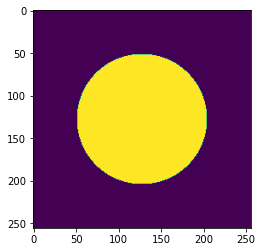

In [50]:
plt.imshow(bool_ind[:,:,128])

In [44]:
inds.shape

(1873912, 3)

In [45]:
vals.shape

(256, 256, 256)

In [46]:
%%timeit
c=np.sum(vals[inds[:,0],inds[:,1],inds[:,2]])

14.3 ms ± 1.32 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [47]:
%%timeit
np.sum(vals[bool_ind])

7.07 ms ± 570 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [41]:
%%timeit
c=0
for ind in inds:
    c+=vals[ind[0],ind[1],ind[2]]

1.55 s ± 47.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [48]:
%%timeit
c=np.sum(vals[indsT[0,:],indsT[1,:],indsT[2,:]])

13.8 ms ± 1.46 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [51]:
%%timeit
np.sum(vals*bool_ind)

27.6 ms ± 6.01 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [53]:
%%timeit
np.sum(vals,where=bool_ind)

7.55 ms ± 43.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
6e-1 per 512 512 512 float32
1.25 per 512 512 512 float64

8.6e-2 s per 256 256 256 float32
1.5e-1 s per 256 256 256 float64

2.4e-4 per 256 256 float32
3.9e-4 per 256 256 float64